# Week 3 — Perform Exploratory Data Analysis

In [1]:
# pip install dask[complete]

import pandas as pd
import numpy as np
import dask.dataframe as dd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Load datasets.  
Kaggle already gave us the dataset split in train/test, but we will not load it for now since the model is not supposed to see this data.  
We will split the train dataset in train/validation

In [2]:
pd.set_option('display.max_columns', None)

train = pd.read_csv('train_final.csv')
# test = pd.read_csv('test_ver2.csv') #Kaggle already gave us the dataset split in train/test. We will now split the train dataset in train/validation

C:\Users\MARIA\AppData\Local\Temp\ipykernel_2420\1536958298.py:3: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('train_final.csv')


In [3]:
#Setting a variable for all products the bank offers
products = ['savings_acct', 'guarantees', 'current_acct', 'derivada_acct', 'payroll_acct', 
            'junior_acct', 'mas_particular_acct', 'particular_acct', 'particular_plus_acct', 
            'short_term_depo', 'medium_term_depo', 'long_term_depo', 'e_acct', 'funds', 
            'mortgage', 'pension', 'loans', 'taxes', 'credit_card', 'securities', 
            'home_acct', 'payroll_acct', 'pensions_2', 'direct_debt']

train['total_products'] = train[products].sum(axis=1)

## NA values treatment

Double checking for dtypes and null values, but as per last week's code it shouldn't be any  
We will deal with the null values we replaced

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10501007 entries, 0 to 10501006
Data columns (total 46 columns):
 #   Column                Dtype  
---  ------                -----  
 0   date                  object 
 1   customer_code         int64  
 2   employee_index        object 
 3   country               object 
 4   sex_H                 int64  
 5   age                   int64  
 6   first_contract_date   object 
 7   new_cust              int64  
 8   seniority_in_months   int64  
 9   primary_cust          int64  
 10  last_date_primary     object 
 11  cust_type             object 
 12  cust_relationship     object 
 13  residency_spain       int64  
 14  birth_spain           int64  
 15  join_channel          object 
 16  deceased              int64  
 17  province_name         object 
 18  active_cust           int64  
 19  income                float64
 20  segment               object 
 21  savings_acct          int64  
 22  guarantees            int64  
 23  curre

In [5]:
#Changing dates columns to datetime type

dates = ['date', 'first_contract_date']
train[dates] = train[dates].apply(pd.to_datetime)

In [6]:
# Checking unique variables per column and NA/0 values  

list_col = list(train.columns)

for clean in list_col:
    print (f"{clean} variables: {train[clean].unique()}")
    print(f"NA values: {train[clean].isna().sum()}")

date variables: <DatetimeArray>
['2015-06-28 00:00:00', '2015-07-28 00:00:00', '2015-08-28 00:00:00',
 '2015-09-28 00:00:00', '2015-10-28 00:00:00', '2015-11-28 00:00:00',
 '2015-12-28 00:00:00', '2016-01-28 00:00:00', '2016-02-28 00:00:00',
 '2016-03-28 00:00:00', '2016-04-28 00:00:00', '2016-05-28 00:00:00']
Length: 12, dtype: datetime64[ns]
NA values: 0
customer_code variables: [  16132 1063040 1063041 ... 1173729 1164094 1550586]
NA values: 0
employee_index variables: ['N' 'A' 'B' 'F' 'S']
NA values: 0
country variables: ['ES' 'CL' 'NL' 'AT' 'CH' 'CA' 'IE' 'GB' 'AR' 'DE' 'DO' 'BE' 'MX' 'FR'
 'VE' 'QA' 'US' 'HN' 'EC' 'CR' 'CO' 'NI' 'BR' 'PT' 'MZ' 'AL' 'SE' 'IT'
 'PE' 'IN' 'PY' 'MA' 'PL' 'CN' 'FI' 'TW' 'GR' 'AE' 'PR' 'HK' 'RO' 'GT'
 'NO' 'BG' 'GA' 'RU' 'UA' 'SN' 'MR' 'EE' 'SV' 'CZ' 'IL' 'SA' 'CI' 'LU'
 'PA' 'ET' 'CM' 'BA' 'BO' 'HR' 'SG' 'BY' 'NG' 'CU' 'JP' 'SK' 'AU' 'MD'
 'TR' 'KE' 'UY' 'ZA' 'GE' 'DK' 'AD' 'GQ' 'EG' 'DZ' 'TH' 'PK' 'LY' 'TN'
 'TG' 'LB' 'KR' 'KH' 'GH' 'RS' 'KW' 'PH' 'V

In [7]:
pd.set_option('display.max_rows', None)

count_col = ['primary_cust', 'last_date_primary', 'deceased', 'seniority_in_months']

for col in count_col:
    count = train[col].value_counts()
    percentage = (count/count.sum()*100).round(2)
    products_bought = train.groupby(col)['total_products'].sum()
    summary = pd.DataFrame({'Count': count, 'Percentage':percentage, 'Products Owned': products_bought})
    print(summary)

                 Count  Percentage  Products Owned
primary_cust                                      
1             10480153        99.8        14104566
99               20854         0.2            1822
                      Count  Percentage  Products Owned
last_date_primary                                      
0                  10480153       99.80        14104566
2015-07-01              142        0.00              40
2015-07-02               63        0.00              17
2015-07-03               95        0.00              34
2015-07-06              138        0.00              38
2015-07-07              112        0.00              56
2015-07-08               65        0.00              27
2015-07-09              148        0.00              43
2015-07-10              117        0.00              57
2015-07-13               81        0.00              35
2015-07-14               72        0.00              26
2015-07-15               91        0.00              47
2015-07-16  

**Analyzing columns: Last Date Primary and Primary Customer**

In [8]:
print(train['last_date_primary'].value_counts())
print(train['primary_cust'].value_counts())

last_date_primary
0             10480153
2015-12-24         763
2015-12-28         521
2015-12-21         206
2015-12-17         172
2016-01-19         169
2016-01-05         167
2015-12-16         158
2015-07-09         148
2015-07-01         142
2015-12-18         139
2015-07-06         138
2016-04-01         132
2015-10-26         131
2015-07-21         130
2016-02-15         129
2015-10-05         129
2016-05-02         128
2015-11-02         128
2016-05-26         128
2015-10-28         125
2016-05-24         124
2016-01-13         122
2016-02-01         121
2015-07-10         117
2015-10-01         115
2015-07-28         115
2015-09-14         114
2015-10-15         113
2016-01-27         112
2015-07-07         112
2015-10-07         112
2016-05-19         111
2015-09-18         111
2015-07-17         111
2016-01-22         111
2015-11-18         110
2015-07-20         110
2015-10-19         110
2015-11-16         109
2015-11-24         109
2016-01-26         109
2016-05-27      

In [9]:
non_primary = train[train['primary_cust'] == 99]
non_primary['total_products'].sum()

1822

0 dates on last_date_primary mean they are still primary customers  
We will drop the column primary customer and keep the last date as primary customer since we can have all the information from one column -customers that do not have a date are still primary  
We will keep the non-primary customers since they still own products of the bank

**Analyzing column: Deceased**

In [10]:
train.groupby('deceased')[products].sum()

,savings_acct,guarantees,current_acct,derivada_acct,payroll_acct,junior_acct,mas_particular_acct,particular_acct,particular_plus_acct,short_term_depo,medium_term_depo,long_term_depo,e_acct,funds,mortgage,pension,loans,taxes,credit_card,securities,home_acct,payroll_acct,pensions_2,direct_debt
deceased,,,,,,,,,,,,,,,,,,,,,,,,
0,958,214,6488365,3821,539367,90875,93534,1224073,410541,13755,14864,408996,818287,178694,55297,87879,23989,518765,428935,247980,36493,539367,588624,1262545
1,0,0,12798,12,59,0,106,8225,1236,42,40,831,1211,1042,257,318,147,1443,27,1120,41,59,159,997


Deceased clients have a few products, and they make up 0.2% of the database. Deceased clients are not going to buy any more products, so we will drop the rows of deceased clients and drop the column

**Analyzing column: Seniority in Months**  
We will drop the rows with value -999999

**Analyzing column: Province Name**  
We will drop the rows where province name = others

**Analyzing column: Age**  
We will drop columns where age is 0 and over 100. We believe these clients are not going to be valuable on our model

**Analyzing column: Income**

In [11]:
(train['income'] == 0).sum()

2238903

**Analyzing columns: Seniority in Months and First Contract Date**  
We had the impression these two columns were giving us the same information and we decided to check the correlation. Turns out it is highly correlated, so we'll keep the column seniority in months.  
Before we delete the first contract date column, we want to extract any information we might need from it.

In [12]:
correlation = train[['seniority_in_months', 'first_contract_date']].corr()
print(correlation)

                     seniority_in_months  first_contract_date
seniority_in_months              1.00000             -0.03798
first_contract_date             -0.03798              1.00000


Text(0, 0.5, 'Count in millions')

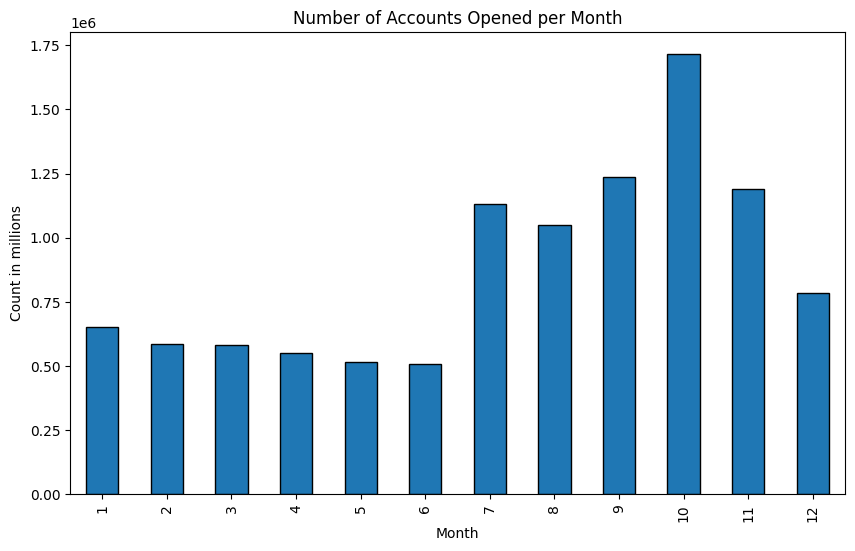

In [13]:
month_count = train['first_contract_date'].dt.month.value_counts().sort_index()

month_count.plot(kind='bar', figsize=(10, 6), edgecolor='black')
plt.title('Number of Accounts Opened per Month')
plt.xlabel('Month')
plt.ylabel('Count in millions')

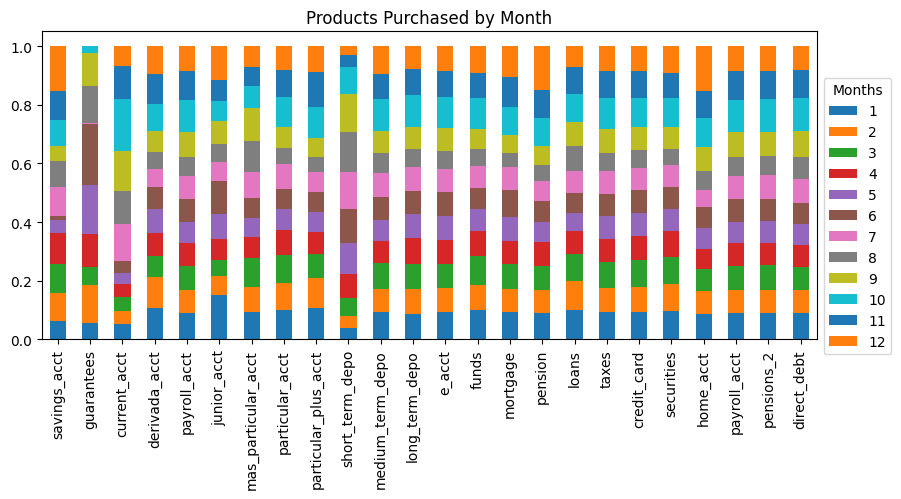

In [14]:
months = train['first_contract_date'].dt.month
dummy = train.groupby(months)[products].sum()
dummy = (dummy/dummy.sum()).T
ax = dummy.plot(kind='bar', stacked=True, figsize=(10,4))
plt.legend(loc='center left', title='Months', bbox_to_anchor=(1, .4))
plt.title('Products Purchased by Month')
plt.show()

When we plot contract dates by month to see if there is any seasonality, we can conclude that the last half of the year has significantly more new contracts than the first half. This can maybe be explained by raises, bonus, new people getting hired after summer, and other factors  
We don't see any patterns on product purchases for a specific month. Looks like the increase on purchases in the second half of the year is an overall increase 

In [15]:
train = train.drop(columns=['primary_cust'])
train = train.drop(columns=['first_contract_date'])

train = train[train['deceased'] != 1]
train = train.drop(columns=['deceased'])

train = train[train['province_name'] != 'other']
train = train[train['seniority_in_months'] != -999999]

train = train[(train['age'] > 0) & (train['age'] <= 100)]

In [16]:
train = train[train['income'] != 0]

## Splitting the dataset into train and validation
We will use the 80/20 ratio

In [17]:
train, val_set = train_test_split(train, test_size=0.2, random_state=42)

# Check the shapes
print(f"Training set shape: {train.shape}")
print(f"Validation set shape: {val_set.shape}")

Training set shape: (6585426, 43)
Validation set shape: (1646357, 43)


In [18]:
train.to_csv('train_cleaned.csv')
val_set.to_csv('val_set.csv')

## EDA

In [19]:
train.describe().round(2)

,date,customer_code,sex_H,age,new_cust,seniority_in_months,residency_spain,birth_spain,active_cust,income,savings_acct,guarantees,current_acct,derivada_acct,payroll_acct,junior_acct,mas_particular_acct,particular_acct,particular_plus_acct,short_term_depo,medium_term_depo,long_term_depo,e_acct,funds,mortgage,pension,loans,taxes,credit_card,securities,home_acct,payroll_acct.1,pensions_2,direct_debt,total_products
count,6585426,6585426.00,6585426.00,6585426.00,6585426.00,6585426.00,6585426.0,6585426.00,6585426.00,6585426.00,6585426.00,6585426.0,6585426.00,6585426.00,6585426.00,6585426.00,6585426.00,6585426.00,6585426.00,6585426.00,6585426.00,6585426.00,6585426.00,6585426.00,6585426.00,6585426.00,6585426.00,6585426.00,6585426.00,6585426.00,6585426.00,6585426.00,6585426.00,6585426.00,6585426.00
mean,2015-12-16 17:06:37.483170048,812506.38,0.45,40.68,0.03,83.14,1.0,0.04,0.44,134152.02,0.00,0.0,0.62,0.00,0.06,0.01,0.01,0.13,0.04,0.00,0.00,0.04,0.09,0.02,0.01,0.01,0.00,0.06,0.05,0.03,0.00,0.06,0.06,0.13,1.41
min,2015-06-28 00:00:00,15889.00,0.00,2.00,0.00,0.00,0.0,0.00,0.00,1202.73,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2015-09-28 00:00:00,437619.00,0.00,25.00,0.00,26.00,1.0,0.00,0.00,68520.84,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
50%,2015-12-28 00:00:00,909502.50,0.00,40.00,0.00,54.00,1.0,0.00,0.00,101561.28,0.00,0.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
75%,2016-03-28 00:00:00,1180925.00,1.00,51.00,0.00,139.00,1.0,0.00,1.00,155530.23,0.00,0.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00
max,2016-05-28 00:00:00,1454620.00,1.00,100.00,1.00,256.00,1.0,1.00,1.00,28894395.51,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,15.00
std,NaN,423752.09,0.50,17.08,0.18,66.29,0.0,0.21,0.50,233544.39,0.01,0.0,0.49,0.02,0.23,0.10,0.09,0.33,0.20,0.04,0.04,0.20,0.28,0.13,0.08,0.10,0.05,0.23,0.21,0.16,0.06,0.23,0.24,0.34,1.54


From the descriptive statistics table we can see:  
 - There are more man than women in the dataset  
 - The average and median age in the dataset is 40 years old
 - There is a good range of seniority in the dataset, ranging from 0 to 256 months, or 21.3 years
 - Most of the clients in the dataset have their primary residency and birth place in Spain

### Counting values, percentage and product bought for variables on columns employee_index, country, primary_customer, residency_spain, and deceased

In [20]:
pd.set_option('display.max_rows', None)

count_col = ['employee_index', 'country', 'residency_spain', 'birth_spain']

for col in count_col:
    count = train[col].value_counts()
    percentage = (count/count.sum()*100).round(2)
    products_bought = train.groupby(col)['total_products'].sum()
    summary = pd.DataFrame({'Count': count, 'Percentage':percentage, 'Products Owned': products_bought})
    print(summary)

                  Count  Percentage  Products Owned
employee_index                                     
A                  1332        0.02            8112
B                  1875        0.03            6643
F                  1360        0.02            5102
N               6580848       99.93         9248149
S                    11        0.00              88
           Count  Percentage  Products Owned
country                                     
BO            12         0.0              12
DE            10         0.0              10
ES       6585381       100.0         9268045
IT            18         0.0              27
PY             5         0.0               0
                   Count  Percentage  Products Owned
residency_spain                                     
0                     45         0.0              49
1                6585381       100.0         9268045
               Count  Percentage  Products Owned
birth_spain                                     
0          

Most of the dataset is composed of clients from Spain and non-employees.  
Even thought non-spanish and employees clients are the absolute minority in the database, it still can be an important factor for these specific clients when predicting which products they will buy

### Analyzing column: Sex

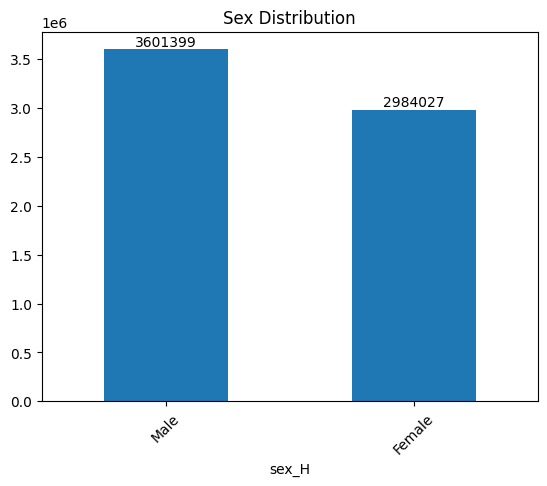

In [21]:
sex_plot = train['sex_H'].value_counts().plot(kind='bar')
plt.title('Sex Distribution')
plt.xticks(ticks=[0,1], labels=['Male', 'Female'], rotation=45)
plt.bar_label(sex_plot.containers[0], fmt=int)
plt.show()

In [22]:
# Defining function to plot column data and see product purchasing behavior
def plot_grouped_data(df, group_col, products, colormap='rainbow', title='Grouped Data', show_legend=True):
    dummy = df.groupby(group_col)[products].sum()
    dummy = (dummy/dummy.sum()).T
    ax = dummy.plot(kind='bar', stacked=True, colormap=colormap, figsize=(10,4))
    ax.set_title(title)

    if show_legend:
        plt.legend(loc='center left', title='Legend', bbox_to_anchor=(1, .4))
    else:
        plt.legend().set_visible(False)


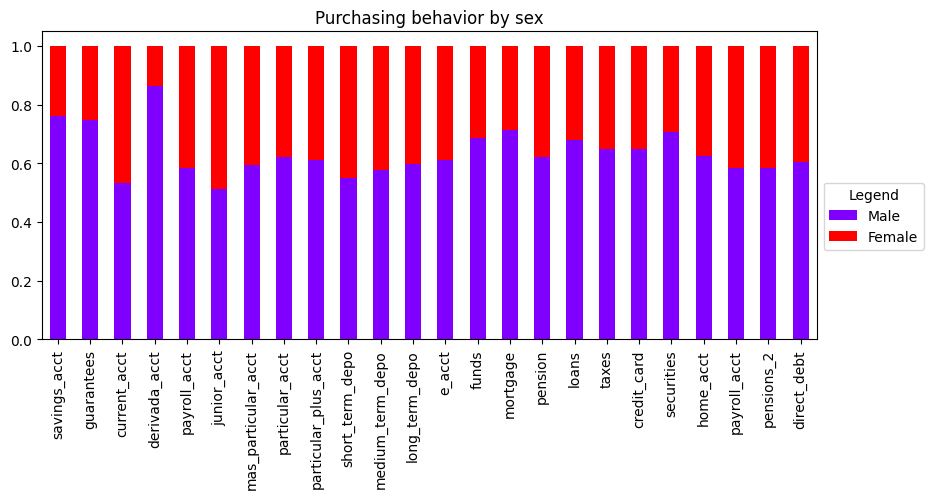

In [23]:
plot_grouped_data(train, 'sex_H', products, title='Purchasing behavior by sex', show_legend=True)
plt.legend(labels=('Male', 'Female'),loc='center left', title='Legend', bbox_to_anchor=(1, .4))
plt.show()

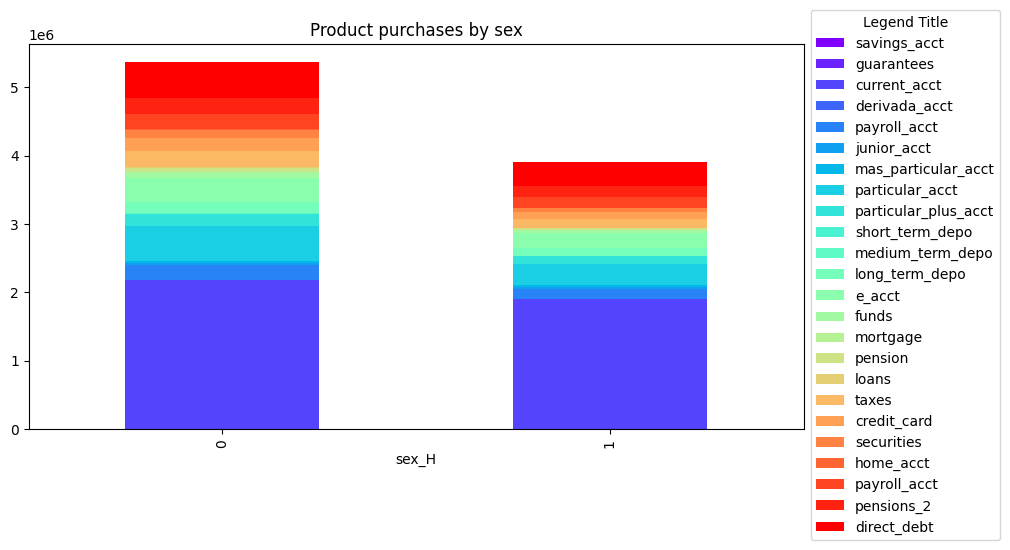

In [24]:
dummy = train[['sex_H']+products].groupby('sex_H').sum()
dummy.plot(kind='bar',stacked=True, colormap='rainbow',figsize=(10,5))
plt.legend(loc='center left', title='Legend Title', bbox_to_anchor=(1, .4))
plt.title('Product purchases by sex')
plt.show()

In [25]:
dummy

,savings_acct,guarantees,current_acct,derivada_acct,payroll_acct,junior_acct,mas_particular_acct,particular_acct,particular_plus_acct,short_term_depo,medium_term_depo,long_term_depo,e_acct,funds,mortgage,pension,loans,taxes,credit_card,securities,home_acct,payroll_acct,pensions_2,direct_debt
sex_H,,,,,,,,,,,,,,,,,,,,,,,,
0,524,113,2172258,2229,216873,31998,32216,517849,172387,4604,5830,168191,342730,83995,27796,38475,10684,236767,193356,119074,16120,216873,237130,518081
1,163,38,1895462,348,155275,30389,21969,313264,110199,3769,4240,113479,218848,38163,11227,23289,5024,128250,104933,49023,9700,155275,169529,340085


- We can see that the bank has more male customers and they have bought more products than female customers
- Male customers have bought most of the products, showing a skewed distribution in the total products bought
- All the products, except derivada account show a relative similar ratio to the amount of male anad female customers, showing that it there may not be a product preference when it comes to gender, and the difference comes from the number of customers

### Analyzing column: Age

In [26]:
age_sex = train.groupby('sex_H')['age'].size()

C:\Users\MARIA\AppData\Local\Temp\ipykernel_2420\2932124040.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_sex_counts = train.groupby(['age_group', 'sex_H']).size().unstack(fill_value=0)


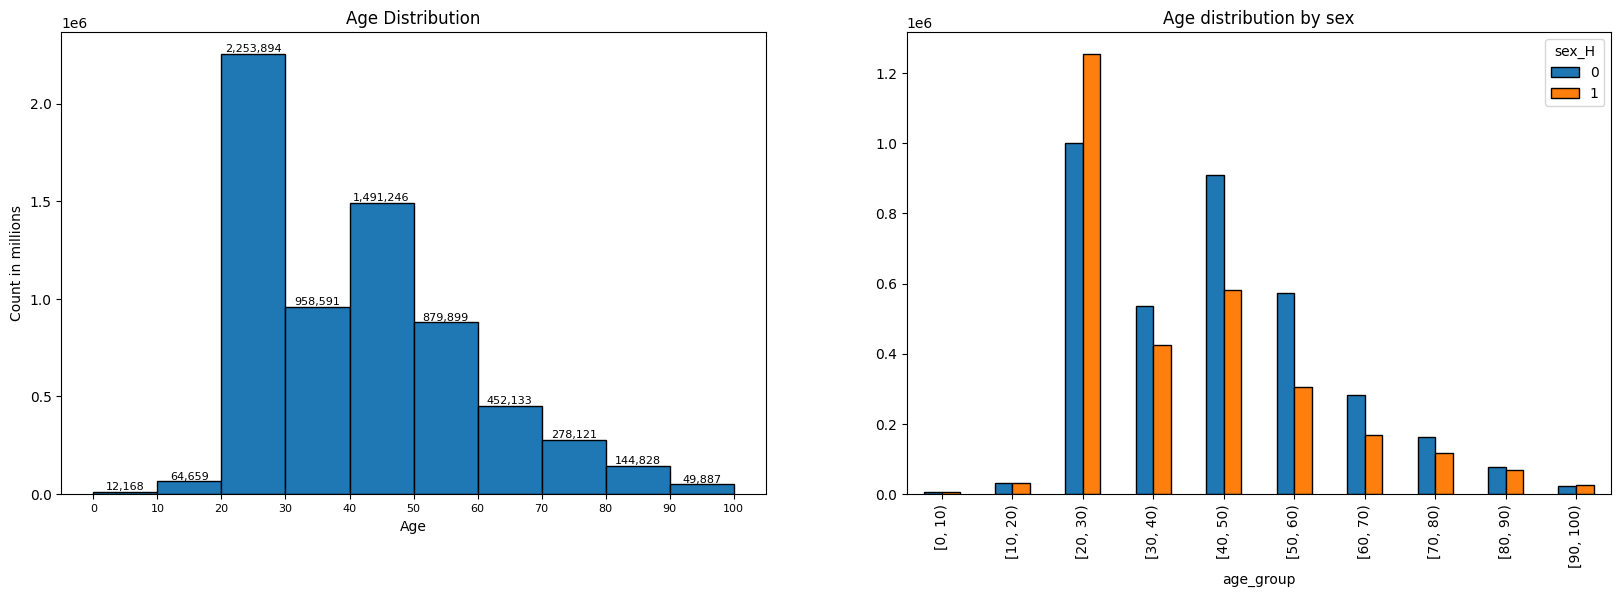

In [27]:
bin_edges = np.arange(0, 101, 10)
labels = [f'{i}-{i+19}' for i in bin_edges[:-1]]

# Create age groups
train['age_group'] = pd.cut(train['age'], bins=bin_edges, right=False)
age_sex_counts = train.groupby(['age_group', 'sex_H']).size().unstack(fill_value=0)

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)

#Age Distribution
bin_edges = np.arange(0, 101, 10)
values, bins, bars = plt.hist(train['age'], bins=bin_edges, edgecolor = 'black')
plt.title('Age Distribution')
plt.ylabel('Count in millions')
plt.xlabel('Age')
plt.xticks(bin_edges, fontsize=8)
plt.bar_label(bars, fmt='{:,.0f}', fontsize=8)

#Age distribution by sex
plt.subplot(1,2,2)
age_sex_counts.plot(kind='bar', stacked=False, edgecolor='black', ax=plt.gca())
plt.title('Age distribution by sex')

plt.show()

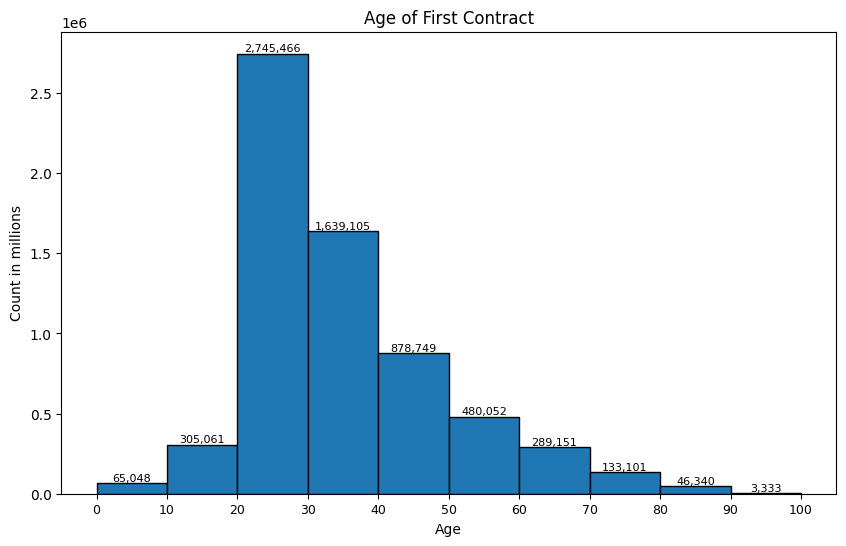

In [28]:
train['first_contract_age'] = train['age']-(train['seniority_in_months']/12).round()

bin_edges = np.arange(0, 101, 10)

plt.figure(figsize=(10,6))
values, bins, bars = plt.hist(train['first_contract_age'], bins=bin_edges, edgecolor = 'black')
plt.title('Age of First Contract')
plt.ylabel('Count in millions')
plt.xlabel('Age')
plt.xticks(bin_edges, fontsize=9)
plt.bar_label(bars, fmt='{:,.0f}', fontsize=8)
plt.show()

C:\Users\MARIA\AppData\Local\Temp\ipykernel_2420\2298204075.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dummy = train.groupby('age_group')[products].sum()
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values

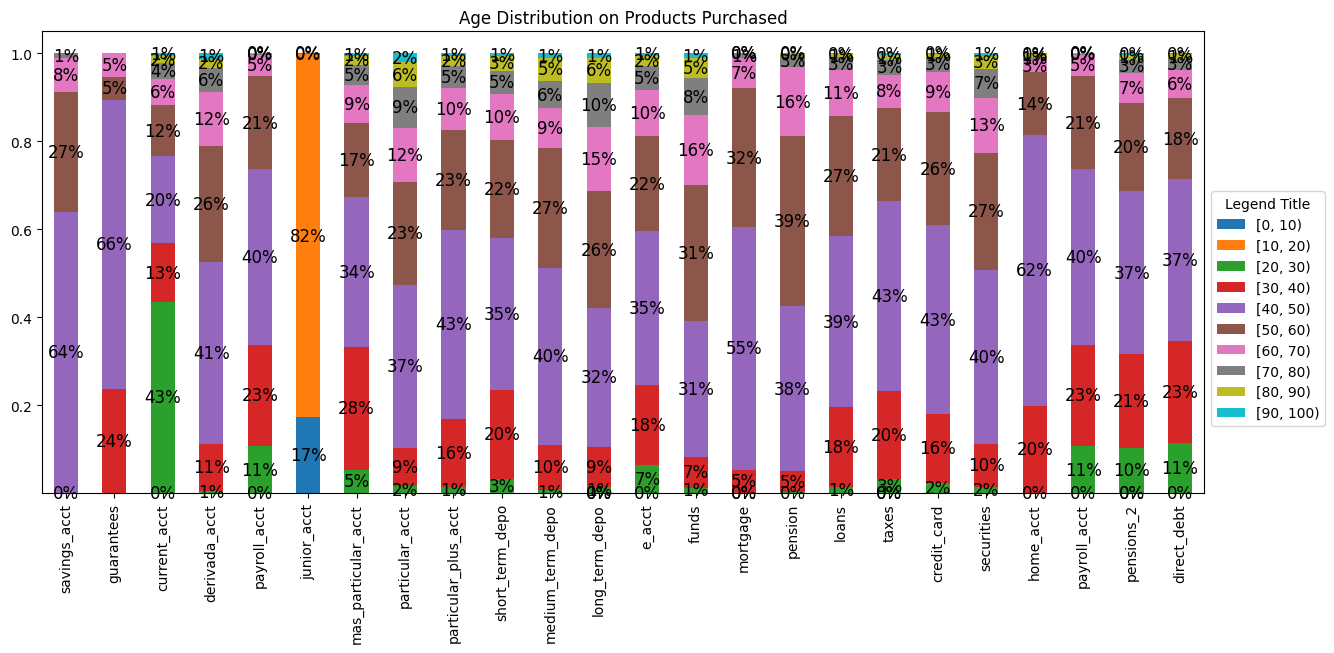

In [29]:
dummy = train.groupby('age_group')[products].sum()
dummy = (dummy/dummy.sum()).T
ax = dummy.plot(kind='bar', stacked=True, figsize=(15,6))
plt.legend(loc='center left', title='Legend Title', bbox_to_anchor=(1, .4))
plt.title('Age Distribution on Products Purchased')

for container in ax.containers:
    ax.bar_label(container, labels=[f'{v*100:.0f}%' for v in container.datavalues], label_type='center', fontsize=12)

plt.show()

In [30]:
dummy*100

age_group,"[0, 10)","[10, 20)","[20, 30)","[30, 40)","[40, 50)","[50, 60)","[60, 70)","[70, 80)","[80, 90)","[90, 100)"
savings_acct,0.000000,0.000000,0.000000,0.145560,63.755459,27.365357,7.714702,1.018923,0.000000,0.000000
guarantees,0.000000,0.000000,0.000000,23.841060,65.562914,5.298013,5.298013,0.000000,0.000000,0.000000
current_acct,0.000270,0.136605,43.306401,13.436175,19.704963,11.637991,5.932956,3.552948,1.766738,0.524954
derivada_acct,0.000000,0.000000,0.504463,10.787738,41.404734,26.154443,12.378735,5.549088,1.823826,1.396973
payroll_acct,0.000000,0.012629,10.804841,22.998377,39.886013,21.118748,4.830874,0.267367,0.063416,0.017735
junior_acct,17.328931,82.472310,0.182730,0.016029,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
mas_particular_acct,0.000000,0.000000,5.418674,27.914660,34.084491,16.841076,8.620785,4.560471,1.939723,0.620121
particular_acct,0.000000,0.000000,1.736690,8.622410,37.027076,23.414315,12.245682,9.333821,5.590998,2.029008
particular_plus_acct,0.000000,0.000000,1.369650,15.600912,42.812701,22.856516,9.579762,4.958698,2.172328,0.649433
short_term_depo,0.000000,0.000000,3.344082,20.088379,34.623194,22.190374,10.414427,5.422190,3.248537,0.668816


- There are more male than female customers in all age groups, except 90-100
- There is a large number of young customers, in the 20-30 range and the second largest group of clients are on the 40-50 age range
- Most clients buy their first product when they are in the age group of 20-30
- There is a clear difference in the age group signed up for the junior account -predominantly with clients in the 10-20 age range
- There is a good amount of variety base on age group and products bough. Product dominance usually interchanges between age groups 40-50 and 50-60, followed by 30-40 

### Analyzing column: New Customers

new_cust
0    6368320
1     217106
Name: count, dtype: int64


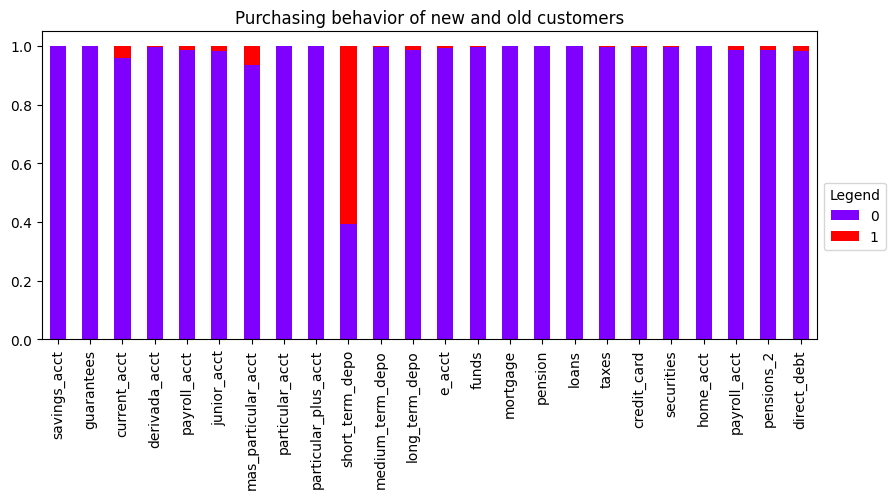

In [31]:
print(train['new_cust'].value_counts())

plot_grouped_data(train, 'new_cust', products, title='Purchasing behavior of new and old customers', show_legend=True)
plt.show()

- New customers purchase mostly short term deposits and mas particular account
- Very few participation on other products, meaning that few products offered by the bank are actually attracting new customers

### Analyzing column: Seniority in Months

seniority_in_months
0      27449
1      33013
2      34634
3      36757
4      37257
5      43738
6      41338
7      48320
8      62647
9      69713
10     79474
11     63051
12     97607
13     72213
14     75454
15     72552
16     74903
17     73913
18     70665
19     65593
20     64672
21     76152
22     67885
23     71651
24     74963
25     65815
26     68901
27     64776
28     64193
29     61969
30     59988
31     57310
32     54736
33     62712
34     58457
35     59613
36     68173
37     60739
38     63232
39     59855
40     62900
41     60929
42     56550
43     61565
44     59926
45     63447
46     59611
47     55124
48     57793
49     53531
50     54128
51     50015
52     53277
53     51749
54     45031
55     37716
56     28051
57     20313
58     15714
59     12488
60     12486
61     13549
62     15003
63     16144
64     16827
65     15668
66     16046
67     15616
68     14913
69     14742
70     13847
71     13260
72     12714
73     10694
74      8992
75   

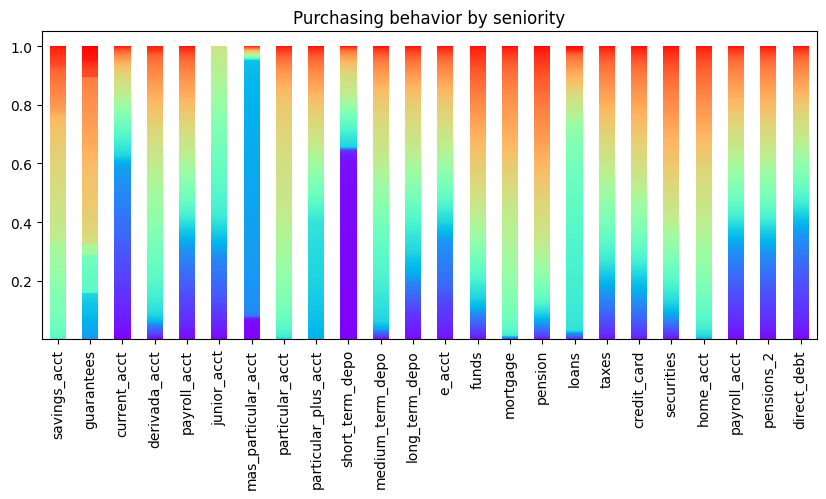

In [32]:
print(train['seniority_in_months'].value_counts().sort_index())

plot_grouped_data(train, 'seniority_in_months', products, title='Purchasing behavior by seniority', show_legend=False)
plt.show()

Cool colors indicate more recent clients and warm colors indicate higher seniority.  
For example: 0 months will be purple, converging to blue green, orange and finally red will be 256 months

- Current account, juniour account, mas account and short term account have the newest clients of the bank
- Oldest customers have bought savings, particular_plus account, mortgage, loans and home accounts

### Analyzing column: Customer Type

Correcting data type

In [33]:
train['cust_type'] = train['cust_type'].astype(str).str.strip()
train['cust_type'].unique()

array(['1.0', '1', '0', '3.0', 'P', '3', '2', '2.0', '4', '0.0', '4.0'],
      dtype=object)

In [34]:
cust_type_map = {'0.0': '0', '1.0': '1', '2.0': '2', '3.0': '3', '4.0': '4'}
train['cust_type'] = train['cust_type'].replace(cust_type_map)

train['cust_type'] = train['cust_type'].astype(object)

print(train['cust_type'].value_counts())
print(train['cust_relationship'].value_counts())

cust_type
1    6558782
0      25543
3        729
2        193
P        136
4         43
Name: count, dtype: int64
cust_relationship
I    3656172
A    2902803
0      25543
P        772
R        136
Name: count, dtype: int64


Same number of NA (0) for both relationship and customer type

In [35]:
na_rel = train[train['cust_type'] == '0']
na_rel[products].sum().sort_values(ascending=False)

current_acct            18516
short_term_depo           261
mas_particular_acct       130
direct_debt               113
pensions_2                 67
payroll_acct               67
payroll_acct               67
long_term_depo             62
junior_acct                55
e_acct                      8
funds                       2
securities                  2
medium_term_depo            0
particular_plus_acct        0
guarantees                  0
mortgage                    0
pension                     0
loans                       0
taxes                       0
credit_card                 0
home_acct                   0
particular_acct             0
derivada_acct               0
savings_acct                0
dtype: int64

In [36]:
train['total_products'].groupby(train['cust_type']).sum()

cust_type
0      19350
1    9247935
2        125
3        532
4         42
P        110
Name: total_products, dtype: int64

In [37]:
dummy = train.groupby('cust_type')[products].sum()
dummy = (dummy/dummy.sum()).T
# dummy.plot(kind='bar',stacked=True, colormap='rainbow',figsize=(20,10))
# plt.legend(loc='center left', title='Legend Title', bbox_to_anchor=(1, .4))
# plt.title('Number of purchases in each month')
# plt.show()

print((dummy*100).round(2))

cust_type                0       1     2     3    4     P
savings_acct          0.00  100.00  0.00  0.00  0.0  0.00
guarantees            0.00  100.00  0.00  0.00  0.0  0.00
current_acct          0.46   99.53  0.00  0.01  0.0  0.00
derivada_acct         0.00  100.00  0.00  0.00  0.0  0.00
payroll_acct          0.02   99.98  0.00  0.00  0.0  0.00
junior_acct           0.09   99.91  0.00  0.00  0.0  0.00
mas_particular_acct   0.24   99.55  0.02  0.16  0.0  0.03
particular_acct       0.00  100.00  0.00  0.00  0.0  0.00
particular_plus_acct  0.00  100.00  0.00  0.00  0.0  0.00
short_term_depo       3.12   96.07  0.08  0.50  0.1  0.13
medium_term_depo      0.00  100.00  0.00  0.00  0.0  0.00
long_term_depo        0.02   99.96  0.01  0.01  0.0  0.00
e_acct                0.00  100.00  0.00  0.00  0.0  0.00
funds                 0.00  100.00  0.00  0.00  0.0  0.00
mortgage              0.00  100.00  0.00  0.00  0.0  0.00
pension               0.00  100.00  0.00  0.00  0.0  0.00
loans         

- Customers with type and relationship missing have bought mostly current account, mas particular account and short term deposit. These are likely new customers
- Customers with type 2, 3 and P have bought mostly mas particular account and short term deposit accounts

### Analyzing column: Join Channel

In [38]:
train['join_channel'].value_counts()

join_channel
KHE      1956912
KAT      1633256
KFC      1569107
KFA       211098
KHQ       192431
KHK       125414
KHD        57530
KHM        56157
KAS        45597
KHN        44109
other      42224
KAG        40564
RED        36243
KAA        34290
KAY        33643
KAB        33141
KAE        26586
KCC        26390
KBZ        25000
KFD        24848
KHL        23727
KAR        17891
KAW        17828
KAZ        16832
KEY        16556
007        16190
KAF        15776
KCI        14727
KAJ        14113
KCH        13475
013        13475
KAH        12716
KHF        11290
KAQ        10011
KHC         8893
KAP         8032
KAM         5941
KGX         5394
KAD         5317
KFP         5221
KEJ         5140
KFT         4726
KGV         4719
KAL         4217
KDR         4195
KBO         3960
KBH         3924
KFG         3641
KAO         3638
KFJ         3607
KFS         3556
KHO         3355
KCB         2946
KCG         2933
KES         2877
KFF         2855
KEN         2730
KEW         2608
K

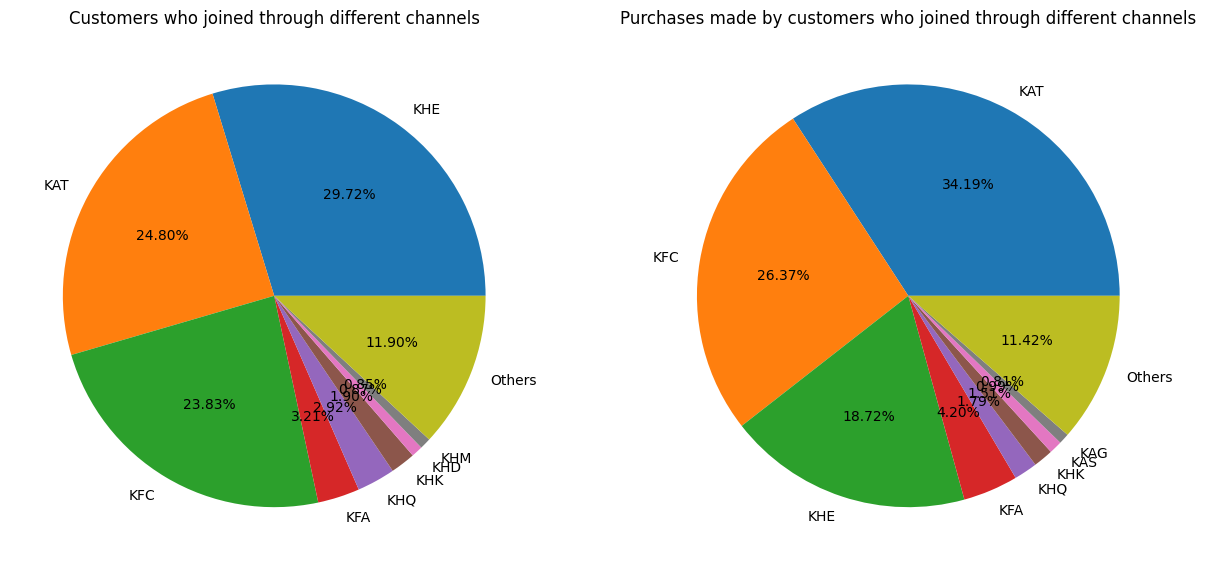

In [39]:
channel = train['join_channel'].value_counts()[:8]
others = train['join_channel'].value_counts()[8:]
dummy = train.groupby('join_channel')[products].sum().sum(axis=1)
dummy = dummy.sort_values(ascending=False)

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.pie(list(channel)+[others.sum()], labels=list(channel.index)+['Others'], autopct='%1.2f%%')
plt.title('Customers who joined through different channels')
plt.subplot(1,2,2)
plt.pie(list(dummy.values[:8])+[dummy.values[8:].sum()], labels = list(dummy.index[:8])+['Others'], autopct='%1.2f%%')
plt.title('Purchases made by customers who joined through different channels')
plt.show()

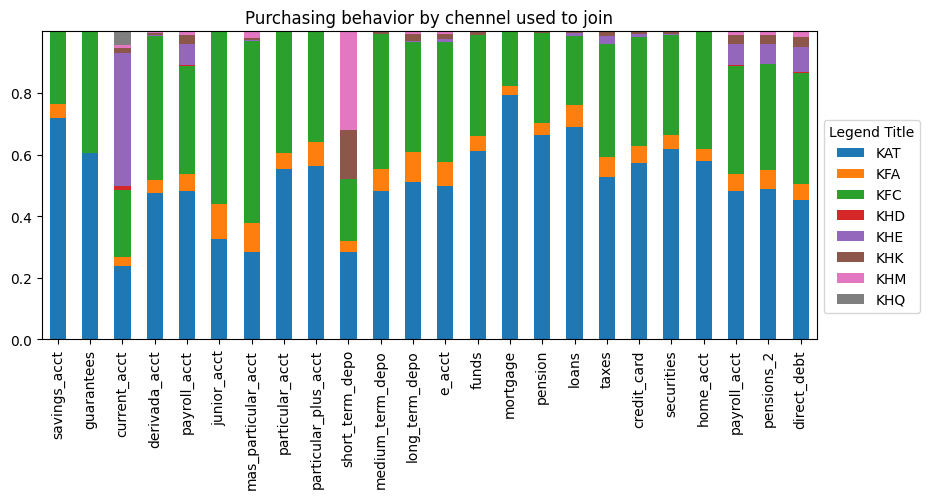

In [40]:
dummy = train.groupby('join_channel')[products].sum()
dummy = dummy[dummy.index.isin(channel.keys())]
dummy = (dummy/dummy.sum()).T
dummy.plot(kind='bar',stacked=True, figsize=(10,4))
plt.legend(loc='center left', title='Legend Title', bbox_to_anchor=(1, .4))
plt.title('Purchasing behavior by chennel used to join')
plt.show()

- The 8 top channels used to join the bank make up 88% of the total customers
- When we compare the number of purchases made by clients with to the channel they joined, 7 out of 8 channels are repeated on the number of clients who joined and number of purchases made, with the exception of "others" which were missing values
- Customers who joined through KAT have most purchases
- Customers who joined through KFC have more purchased than KAT on mas particular account and junior account

### Analyzing column: Province Name

In [41]:
train['province_name'].value_counts().head(10)

province_name
MADRID       2374175
BARCELONA     668909
VALENCIA      341769
SEVILLA       307924
CORUÑA, A     188185
ZARAGOZA      176829
MURCIA        172920
MALAGA        171454
ALICANTE      145271
CADIZ         137873
Name: count, dtype: int64

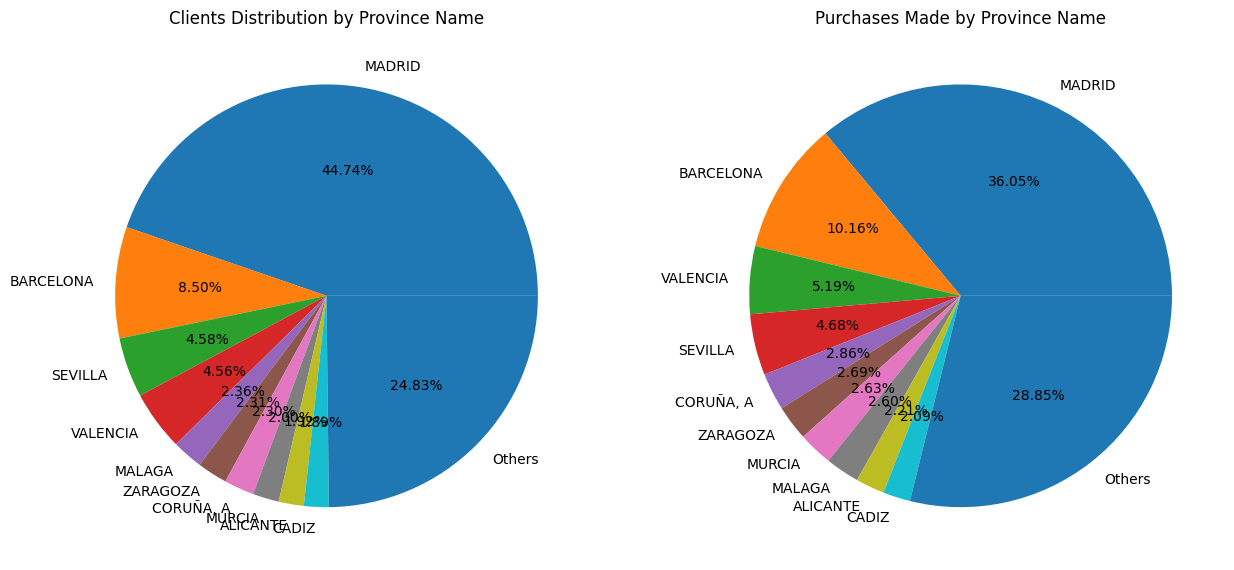

In [42]:
top_province = train['province_name'].value_counts()[:10]
province_others = train['province_name'].value_counts()[10:]
dummy = train.groupby('province_name')[products].sum().sum(axis=1)
dummy = dummy.sort_values(ascending=False)

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.pie(list(dummy.values[:10])+[dummy.values[10:].sum()], labels = list(dummy.index[:10])+['Others'], autopct='%1.2f%%')
plt.title('Clients Distribution by Province Name')
plt.subplot(1,2,2)
plt.pie(list(top_province)+[province_others.sum()], labels=list(top_province.index)+['Others'], autopct='%1.2f%%')
plt.title('Purchases Made by Province Name')
plt.show()

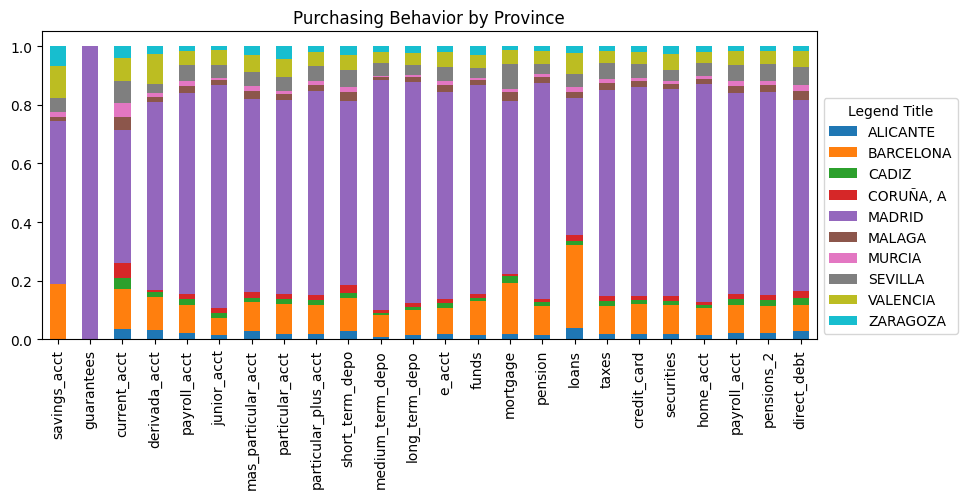

In [43]:
dummy = train.groupby('province_name')[products].sum()
dummy = dummy[dummy.index.isin(top_province.keys())]
dummy = (dummy/dummy.sum()).T
dummy.plot(kind='bar',stacked=True, figsize=(10,4))
plt.legend(loc='center left', title='Legend Title', bbox_to_anchor=(1, .4))
plt.title('Purchasing Behavior by Province')
plt.show()

- We can see most of the clients are from Madrid, Spain's capital, followed by other cities like Barcelona, Valencia and Sevilla
- The distribution of number products bought is quite similar to the number of clients from each city
- Guarantees account have only Madrid clients
- Clients from Barcelona buys mostly loans and savings account

### Analyzing column: Active Customer

active_cust
0    3663219
1    2922207
Name: count, dtype: int64


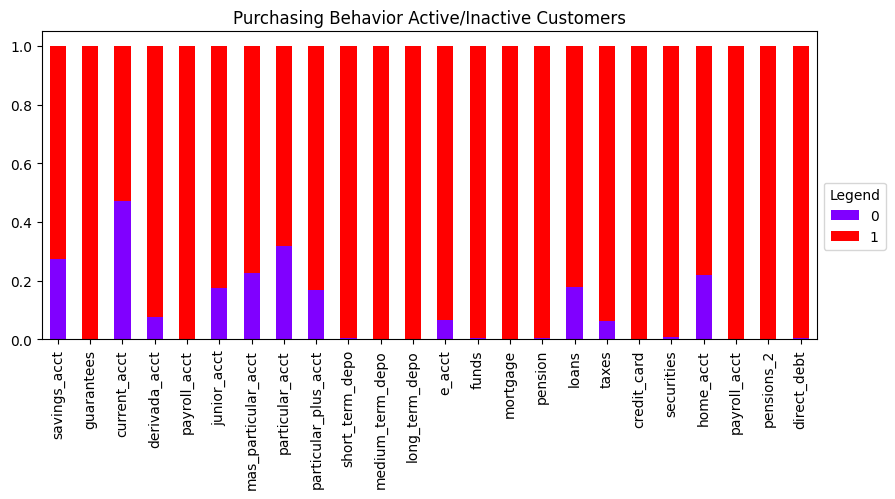

In [44]:
print(train['active_cust'].value_counts())

plot_grouped_data(train, 'active_cust', products, title='Purchasing Behavior Active/Inactive Customers', show_legend=True)
plt.show()

- There is a lot of inactive customers on the dataset, however all products have more active than inactive customers
- The three products with most inactive customers are savings, current and particular account

### Analyzing column: Income

In [45]:
(train['income'] == 0).sum()

0

In [46]:
train.groupby('province_name')['income'].describe().round()

,count,mean,std,min,25%,50%,75%,max
province_name,,,,,,,,
ALAVA,26.0,106274.0,54139.0,55271.0,63120.0,85711.0,164007.0,253563.0
ALBACETE,59642.0,83005.0,37528.0,9180.0,58193.0,78692.0,101539.0,764582.0
ALICANTE,145271.0,87024.0,167250.0,7791.0,45801.0,67277.0,101775.0,17804048.0
ALMERIA,28741.0,84877.0,50430.0,8291.0,53504.0,72941.0,99427.0,578349.0
ASTURIAS,121672.0,101333.0,89158.0,7619.0,66618.0,87096.0,115477.0,4950059.0
AVILA,18804.0,76458.0,70203.0,7290.0,51827.0,68548.0,90950.0,2768593.0
BADAJOZ,91239.0,72081.0,43650.0,7144.0,44542.0,62170.0,87592.0,1103543.0
"BALEARS, ILLES",43227.0,171358.0,460933.0,5040.0,89579.0,122979.0,184843.0,15711716.0
BARCELONA,668909.0,164484.0,150320.0,1471.0,91886.0,130826.0,187443.0,5752268.0


- Median income of the customers of all the products is almost same
- We can see gross house hold income of Ceuta is the highest

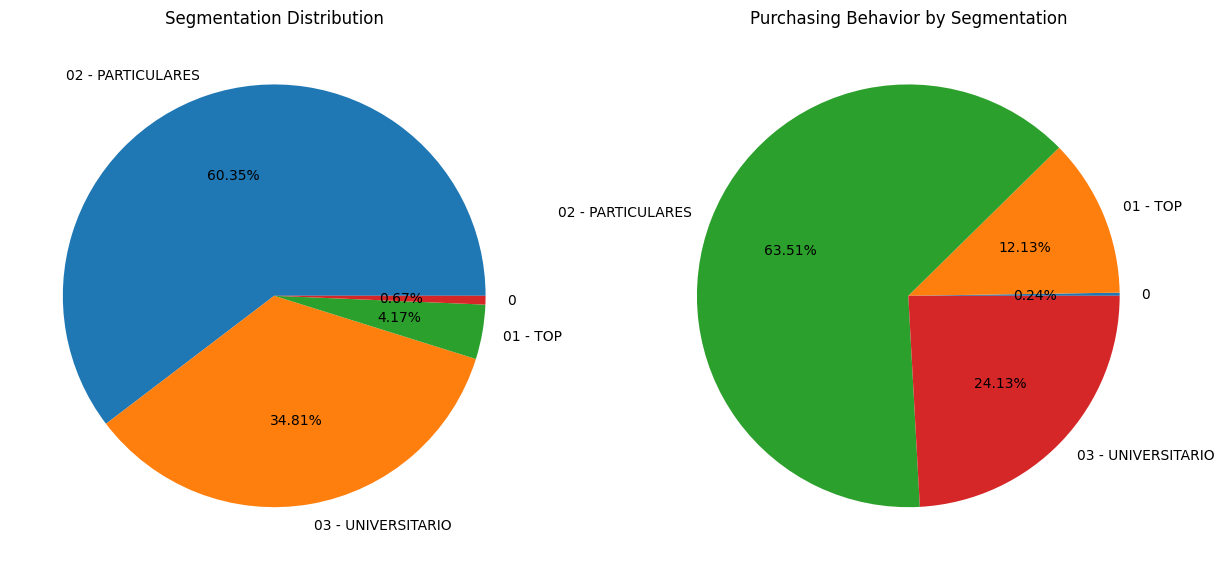

In [47]:
segmentation = train['segment'].value_counts()
seg_products = train.groupby('segment')['total_products'].sum()
seg_products = (seg_products/seg_products.sum())*100
seg_products

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.pie(segmentation, labels=segmentation.keys(), autopct='%1.2f%%')
plt.title('Segmentation Distribution')
plt.subplot(1,2,2)
plt.pie(seg_products, labels=seg_products.index, autopct='%1.2f%%')
plt.title('Purchasing Behavior by Segmentation')
plt.show()

segment
02 - PARTICULARES     3974612
03 - UNIVERSITARIO    2292510
01 - TOP               274426
0                       43878
Name: count, dtype: int64


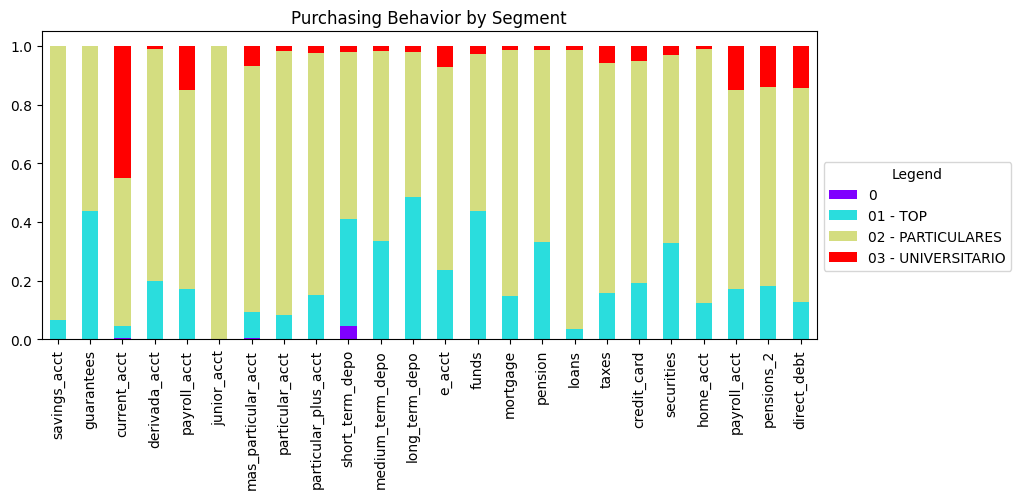

In [48]:
print(train['segment'].value_counts())

plot_grouped_data(train, 'segment', products, title='Purchasing Behavior by Segment', show_legend=True)
plt.show()

- Most customers are from segment #2 - Particulares
- The count of clients on each segment is corrrelated with the products the customers of that segments have bought
- All the customers who have bought juniour account belong to segment 02

### Count of All Products Sold

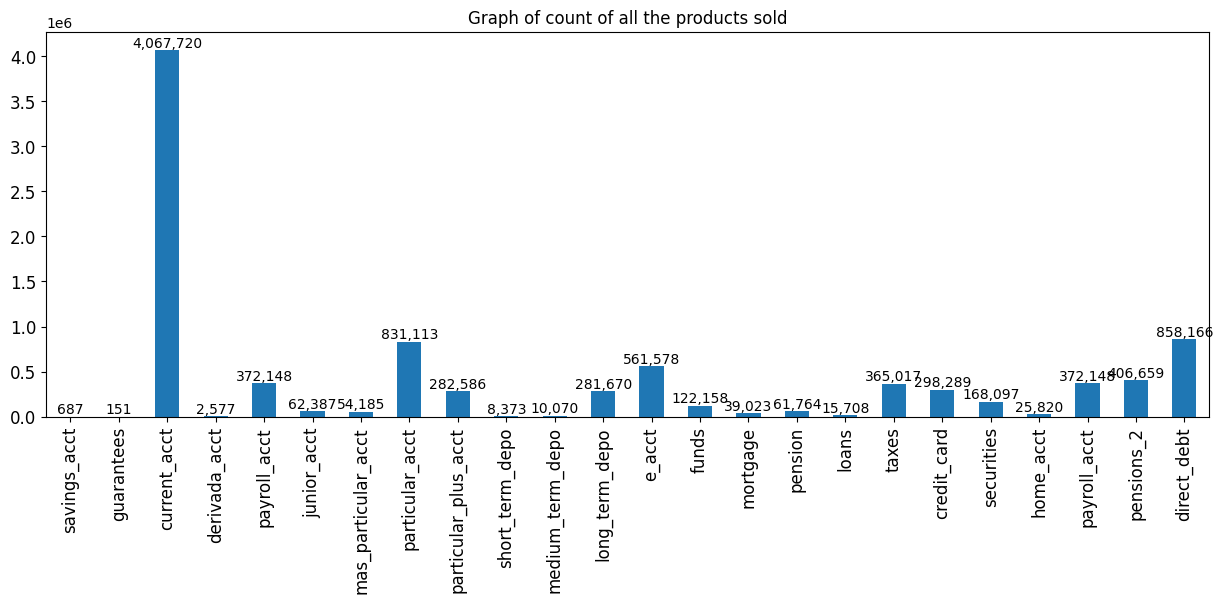

In [49]:
ax = train[products].sum().plot(kind='bar', figsize=(15, 5), fontsize=12)
plt.title('Graph of count of all the products sold')
for container in ax.containers:
    ax.bar_label(container, fmt='{:,.0f}')
# plt.xticks(rotation = 45)
plt.show()

- Current account, particular, direct debit and e_account are the most popular accounts.
- Savings account, guarentees, derivada account, short and medium term deposits are the least popular accounts

# End of Week 3